In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
data_path = '../example_data/data/andor.asc'

In [65]:
def _load_ANDOR_image(path:str)->np.ndarray:
        """Loads an image produced by the ANDOR synchrotron spectroscopy camera from some specified
        path location.
        
        Parameters
        ----------
            path : str
                The path to the image data.
        """

        image = np.genfromtxt(data_path, skip_footer=41)


        #EXTRACT THE FIRST COLUMN, WHICH CONTAIN WAVELENGTHS IN NM- this is "pixels_y"
        wavelengths = image[:, 0]

        #Index the pixels from 0 to the length of the x axis
        pixels_x = np.arange(0, len(image[0]))

        # trim away the first column to remove wavelength data
        image = image[:, 1:]

        return image, pixels_x, wavelengths

image, pixels_x, pixels_y = _load_ANDOR_image(data_path)


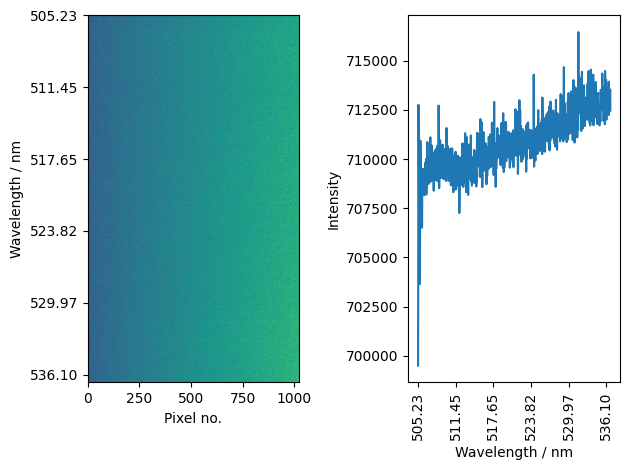

In [ ]:
def plot_andor_image(img, pixels_x, pixels_y):
    
    step = 200

    y_tick_loc = np.arange(0, len(pixels_y), step=step)
    pixels_y_rounded = [f"{pixel:.2f}" for pixel in pixels_y] 

    fig, axs = plt.subplots(nrows=1, ncols=2)
    
    # PHYSICAL IMAGE
    axs[0].imshow(img, aspect='auto')
    axs[0].set_yticks(y_tick_loc)
    axs[0].set_yticklabels(pixels_y_rounded[::step])
    axs[0].set_xlabel("Pixel no.")
    axs[0].set_ylabel("Wavelength / nm")

    #INTEGRATED IMAGE
    intensities = np.sum(img, axis=1)
    axs[1].plot(np.arange(0, img.shape[0]), intensities)
    axs[1].set_xticks(y_tick_loc)
    axs[1].set_xticklabels(pixels_y_rounded[::step], rotation='vertical')
    axs[1].set_ylabel("Intensity")
    axs[1].set_xlabel("Wavelength / nm")
    
    fig.tight_layout()
    #fig.suptitle(f"Image from {self.DEVICE_NAME}, Shot {self.shot_no} \n {self.label}")
    plt.show()

plot_andor_image(image, pixels_x, pixels_y)

In [67]:
a = [[1, 2], [3, 4]]
np.sum(a, axis=1)

array([3, 7])